In [71]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))



In [72]:
from scripts.data_loader import DataPipeline
from scripts.symbols_constants import sp500_symbols

import numpy as np


In [73]:
pipeline = DataPipeline(
    base_folder=r"C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data"
)

# Define symbols and dates
symbols = sp500_symbols
start_date = "2020-01-01"
end_date = "2023-12-31"

# Fetch and store data
data = pipeline.fetch_data(symbols, start_date, end_date)
pipeline.store_data(data, filename="raw_sp500")

data_2 = pipeline.load_data("raw_sp500")

data_wide = pipeline.flat_to_wide(data_2)
pipeline.store_data(data_wide, filename="wide_sp500")


[*********************100%***********************]  42 of 42 completed
c:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\scripts\data_loader.py:50: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_long = data.stack(level=1).reset_index()


Method 'fetch_data' executed in 2.5797 seconds
Data saved to C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\raw_sp500.csv
Method 'store_data' executed in 0.6197 seconds
Data loaded from C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\raw_sp500.csv
Method 'load_data' executed in 0.1504 seconds
Data successfully transformed to wide format.
Method 'flat_to_wide' executed in 0.0206 seconds
Data saved to C:\Users\LucaBenedetti\Documents\personal_dev\long_short_strategy\data\wide_sp500.csv
Method 'store_data' executed in 0.1329 seconds


C:\Users\LucaBenedetti\AppData\Local\Temp\ipykernel_15824\2443907475.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 43 + 1) instead
  rd_idx = np.random.random_integers(1,n_stocks,10)


<Axes: >

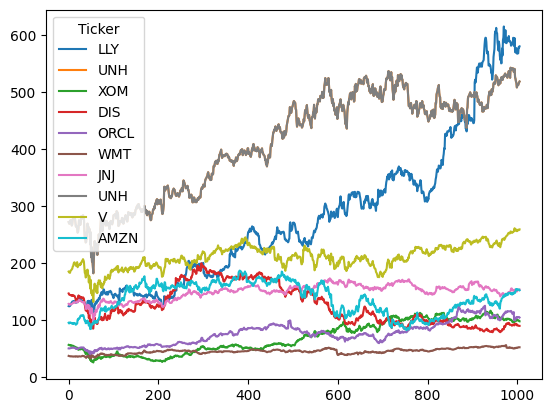

In [74]:
# show 10 random stocks
n_stocks = len(data_wide.columns)
rd_idx = np.random.random_integers(1,n_stocks,10)
# plot some stocks
data_wide.iloc[:,rd_idx].plot()


<Figure size 1200x600 with 0 Axes>

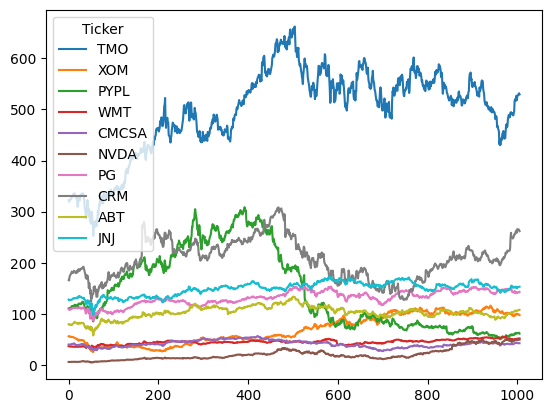

In [75]:
# print(data_wide.describe()) 

# Show 10 random stocks
n_stocks = len(data_wide.columns)
rd_idx = np.random.randint(1, n_stocks, 10)

# Plot some stocks with adjusted figure size
plt.figure(figsize=(12, 6))  # Adjust the size as needed
data_wide.iloc[:, rd_idx].plot()
plt.show()

<Figure size 1000x600 with 0 Axes>

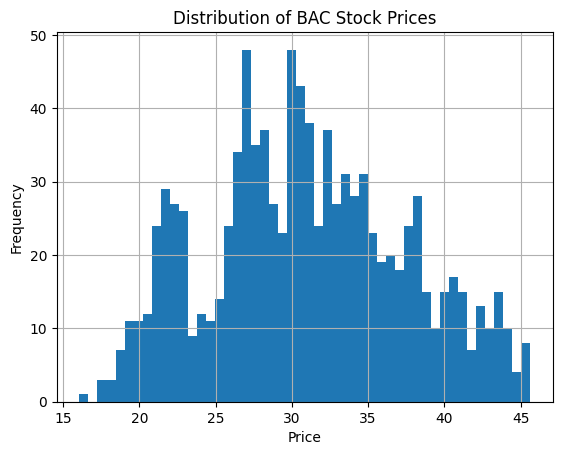

In [76]:
# Distribution of stock prices (take one random)
rd_idx = np.random.randint(1, n_stocks, 1)

plt.figure(figsize=(10, 6))
data_wide.iloc[:,rd_idx].dropna().hist(bins=50)  # Drop NaN values before plotting
plt.title(f'Distribution of {data_wide.columns[rd_idx][0]} Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

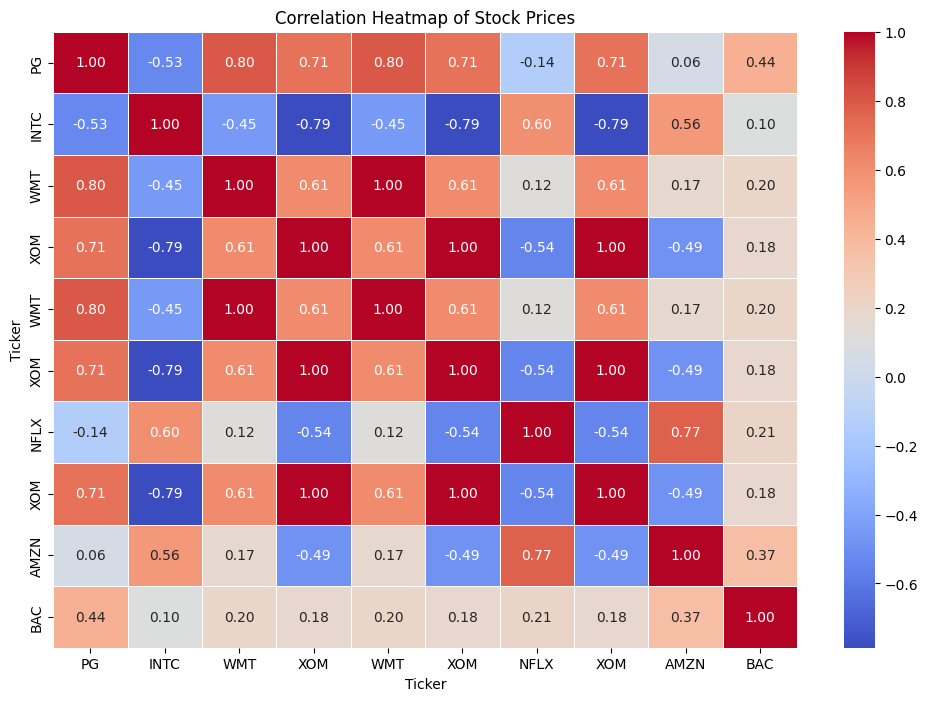

In [77]:
import seaborn as sns

# Calculate correlation matrix
rd_idx = np.random.randint(1, n_stocks, 10)

correlation_matrix = data_wide.iloc[:,rd_idx].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

# TODO: take top 4 correlated (2 pos and 2 neg) and the 2 more uncorrelated and perform the analysis that follows
# analyze correlation with rolling windows
# analyze correlation with retruns instead of prices
# explore a little bit more


In [84]:
# Calculate correlation between two stocks, e.g., AAPL and MSFT
correlation = data_wide['AAPL'].corr(data_wide['MSFT'])
print(f"Correlation between AAPL and MSFT: {correlation}")


Correlation between AAPL and MSFT: 0.9392217923784967


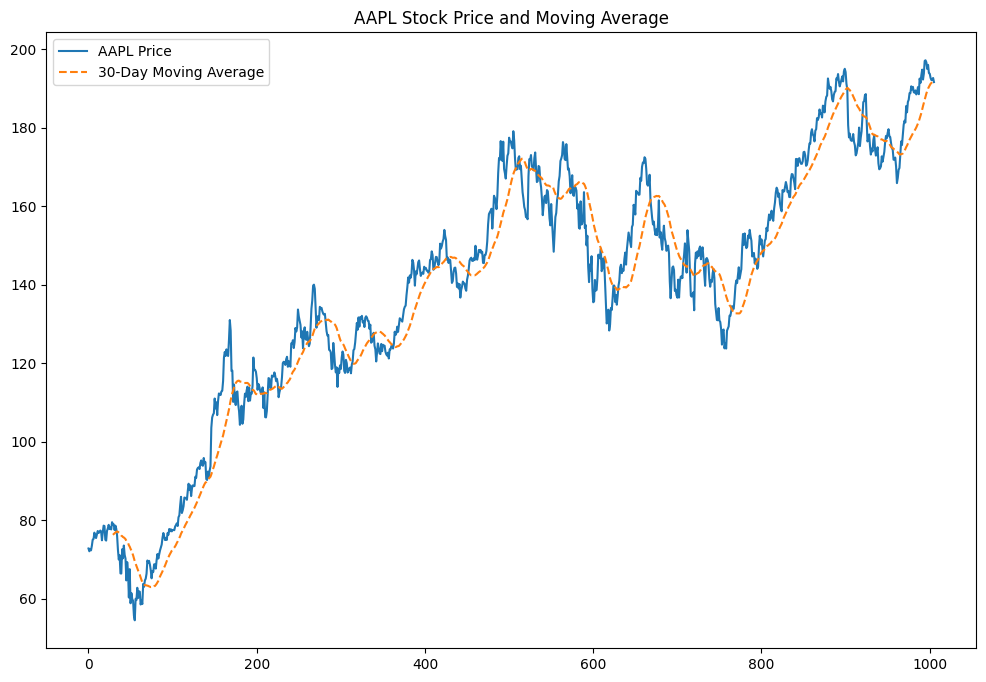

In [82]:
# Calculate moving averages for a smoother trend (e.g., 30-day moving average for AAPL)
data_wide['AAPL_MA30'] = data_wide['AAPL'].rolling(window=30).mean()

# Plot moving average
plt.figure(figsize=(12, 8))
plt.plot(data_wide.index, data_wide['AAPL'], label='AAPL Price')
plt.plot(data_wide.index, data_wide['AAPL_MA30'], label='30-Day Moving Average', linestyle='--')
plt.title('AAPL Stock Price and Moving Average')
plt.legend()
plt.show()


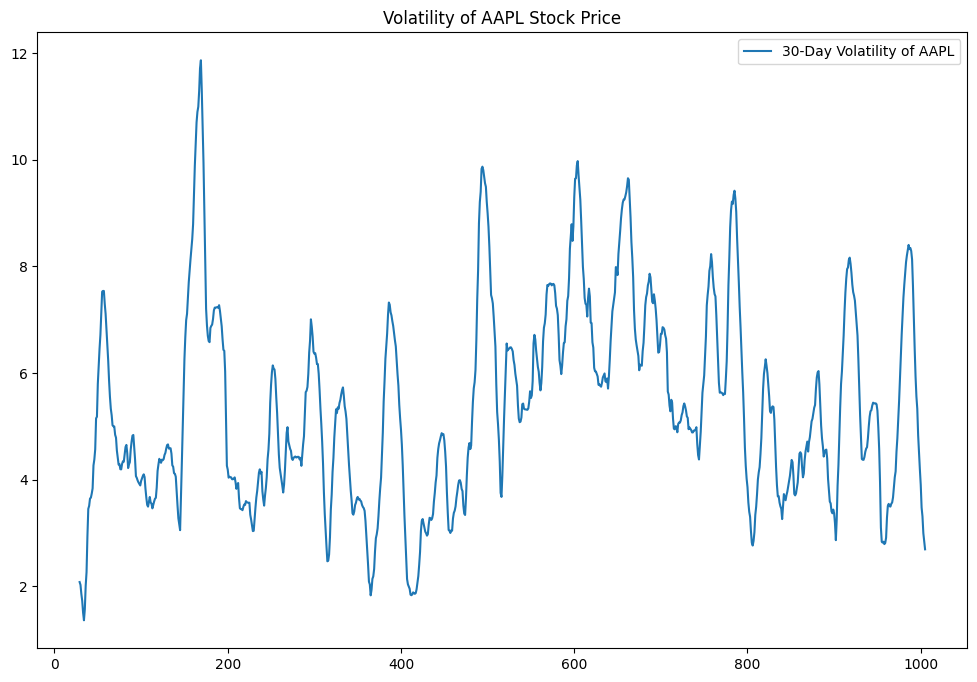

In [80]:
# Calculate rolling standard deviation (volatility) for AAPL
data_wide['AAPL_Volatility'] = data_wide['AAPL'].rolling(window=30).std()

# Plot volatility
plt.figure(figsize=(12, 8))
plt.plot(data_wide.index, data_wide['AAPL_Volatility'], label='30-Day Volatility of AAPL')
plt.title('Volatility of AAPL Stock Price')
plt.legend()
plt.show()
